# Housing Classification Model

This is an example of building a ML Supervised Classification Model, by which different algorithms can be tried out, and once the whole pipeline is built then the hyperparameter tuning and Cross Validation process involves to pick the best model with highest accuracy 

Below I have import all the libraries I need in order to retrieve the data, filter, analyse, vizualize and build the model pipelines

In [89]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn import datasets, decomposition

import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d  

from scipy.stats import wasserstein_distance
import joblib

In [90]:
import sklearn
sklearn.__version__

'1.3.1'

In [91]:
import warnings
warnings.filterwarnings('ignore')

## Reading the data

In [92]:
# data = pd.read_csv(r"C:\Users\kuksj\Downloads\TrippleDot\housing.csv")

data = pd.read_csv(r"housing.csv")
data.sample(3)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17103    -122.23     37.45                34.0       4177.0           723.0   
15044    -116.91     32.78                15.0       4058.0           511.0   
9493     -123.75     39.37                16.0       1377.0           296.0   

       population  households  median_income  median_house_value  \
17103      1586.0       660.0         5.0457            395100.0   
15044      1580.0       473.0         7.5000            316400.0   
9493        830.0       279.0         3.2500            151400.0   

      ocean_proximity  
17103      NEAR OCEAN  
15044       <1H OCEAN  
9493        <1H OCEAN

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [94]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [95]:
data=data.dropna()

In [96]:
data.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20433.000000  20433.000000        20433.000000  20433.000000   
mean    -119.570689     35.633221           28.633094   2636.504233   
std        2.003578      2.136348           12.591805   2185.269567   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1450.000000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.720000           37.000000   3143.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20433.000000  20433.000000   20433.000000   
mean       537.870553   1424.946949    499.433465       3.871162   
std        421.385070   1133.208490    382.299226       1.899291   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563700   
50%        435.000000   1166.000000    409.000000       3.536500   
75%        647.000000   1722.000000    604.000000       4.744000   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20433.000000  
mean        206864.413155  
std         115435.667099  
min          14999.000000  
25%         119500.000000  
50%         179700.000000  
75%         264700.000000  
max         500001.000000

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [98]:
# data.drop('ocean_proximity',axis=1,inplace=True)

In [99]:
# Import the necessary module
from sklearn.preprocessing import KBinsDiscretizer

# Create an instance of the KBinsDiscretizer class, specifying the desired parameters
discretizer = KBinsDiscretizer(n_bins=3, strategy='quantile', encode='ordinal') #uniform, quantile, kmeans

# Fit the discretizer to your data
discretizer.fit(data[['median_house_value']])

# Transform the data into the discrete bin representation
X_discretized = discretizer.transform(data[['median_house_value']])

In [100]:
X_discretized.shape

(20433, 1)

In [101]:
data["target"] = pd.DataFrame(X_discretized)

In [102]:
data["target"].value_counts()

1.0    6759
0.0    6735
2.0    6734
Name: target, dtype: int64

In [103]:
data["target"] = np.where(data["target"]==1, "Medium",
                          np.where(data["target"]==2, "High",
                                   "Low"))

In [104]:
q1 = np.quantile(data["median_house_value"], 0.33)
q2 = np.quantile(data["median_house_value"], 0.50)
q3 = np.quantile(data["median_house_value"], 0.66)

In [105]:
data["target"] = np.where(data["median_house_value"].between(q1, q3), "Medium",
                          np.where(data["median_house_value"]>=q3, "High", 
                                   "Low"))

In [106]:
data["target"].value_counts(True)

High      0.339891
Medium    0.330103
Low       0.330005
Name: target, dtype: float64

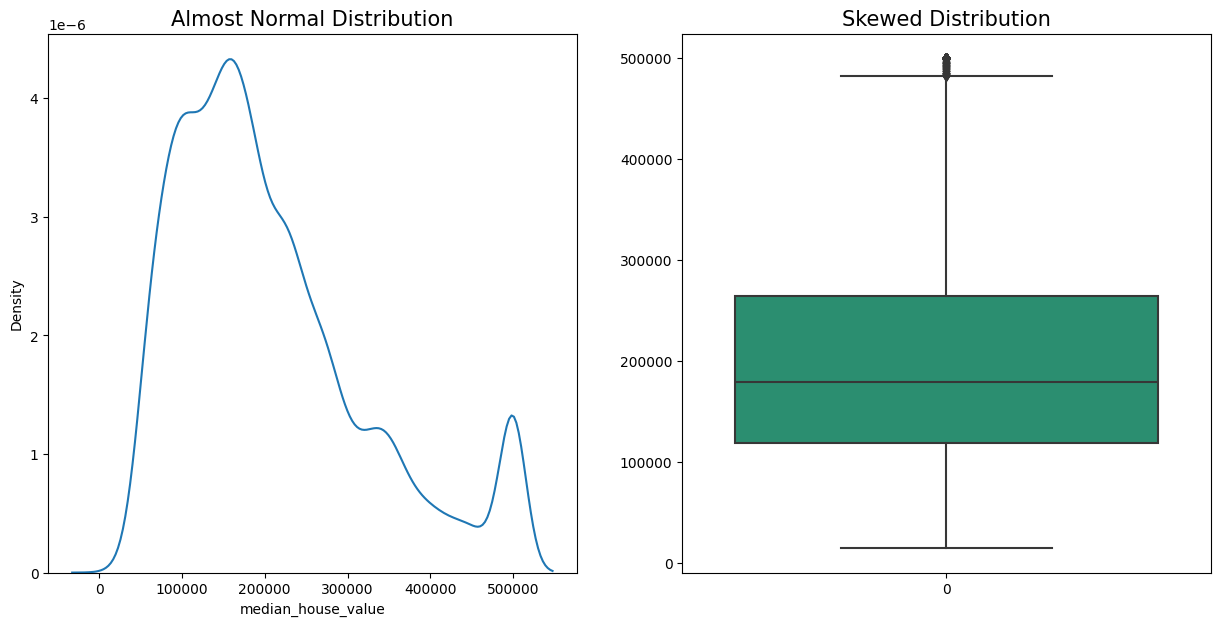

In [107]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("Almost Normal Distribution", fontsize=15)
sns.kdeplot(data = data["median_house_value"])
plt.subplot(1,2,2)
plt.title("Skewed Distribution", fontsize=15)
sns.boxplot(data = data["median_house_value"], palette="Dark2")
plt.show()

In [108]:
# #defining lower and upper limit
# norm_upper_limit = data["median_house_value"].mean() + 3 * data["median_house_value"].std()
# norm_lower_limit = data["median_house_value"].mean() - 3 * data["median_house_value"].std()

In [109]:
# data.shape

In [110]:
# data = data[(data["median_house_value"] > norm_lower_limit) & (data["median_house_value"] < norm_upper_limit)]

In [111]:
numerical_features = data.select_dtypes(include = 'float64').columns
numerical_features

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [112]:
for col in numerical_features:
    q1 = np.quantile(data[col], 0.25)
    q3 = np.quantile(data[col], 0.75)
    iqr = q3-q1
    data = data[data[col].between(q1-1.5*iqr, q3+1.5*iqr)]

In [113]:
data.shape

(16724, 11)

<Axes: xlabel='median_house_value', ylabel='Density'>

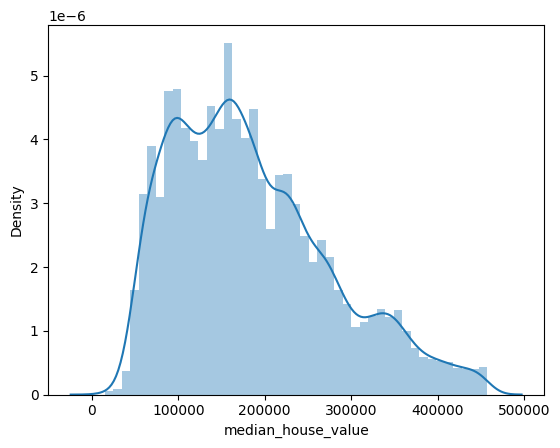

In [114]:
sns.distplot(data["median_house_value"])

In [115]:
# plt.figure(figsize=(15,7))
# plt.subplot(1,2,1)
# plt.title("Almost Normal Distribution", fontsize=15)
# sns.kdeplot(data = data["median_house_value"])
# plt.subplot(1,2,2)
# plt.title("Skewed Distribution", fontsize=15)
# sns.boxplot(data = data["median_house_value"], palette="Dark2")
# plt.show()

In [116]:
#data.drop('median_house_value',axis=1,inplace=True)

In [117]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
target                 object
dtype: object

## Exploratory Data Analysis - EDA

In [118]:
data.sample(2)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12134    -117.16     33.92                12.0       3236.0           502.0   
15408    -117.23     33.22                16.0       3224.0           729.0   

       population  households  median_income  median_house_value  \
12134      1610.0       502.0         4.7568            143500.0   
15408      1036.0       608.0         2.0246            148800.0   

      ocean_proximity  target  
12134          INLAND  Medium  
15408       <1H OCEAN  Medium

In [119]:
data.groupby("target").agg({"median_house_value":'mean', "median_income":'count'}).reset_index()

target  median_house_value  median_income
0    High       304403.022093           4798
1     Low        96069.987891           6111
2  Medium       180877.781599           5815

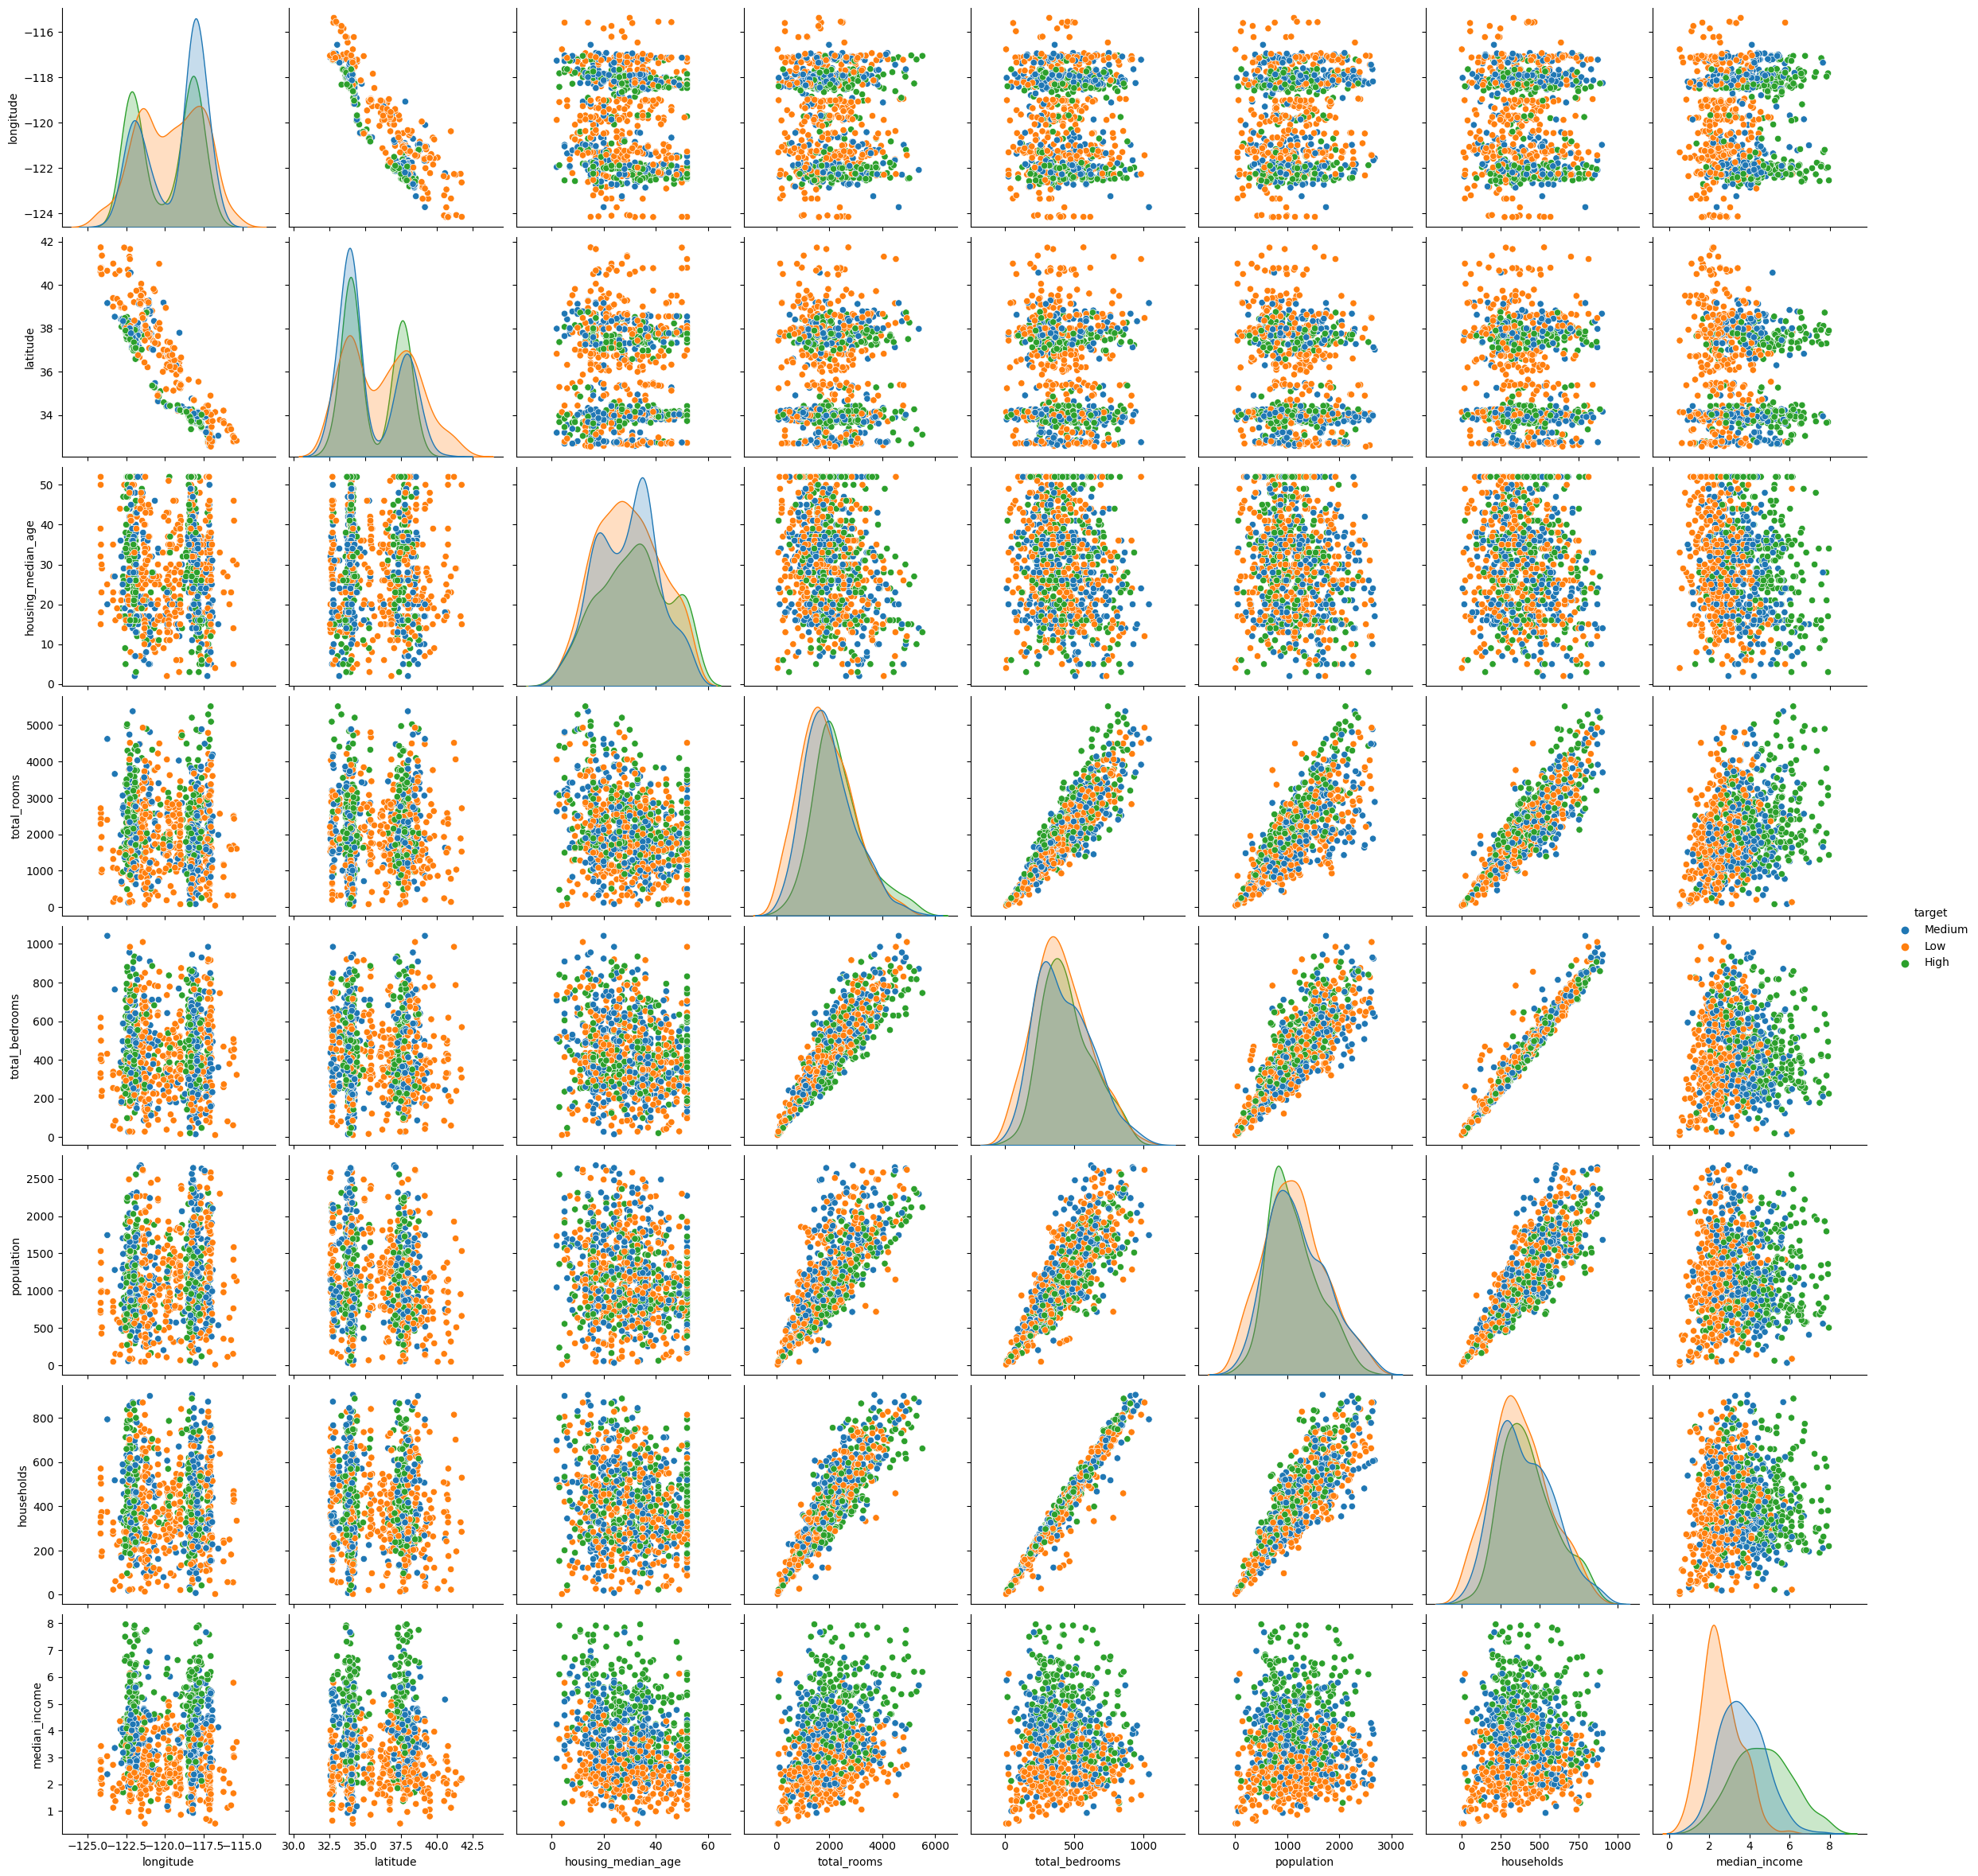

In [120]:
sns.pairplot(data.sample(1000).drop(columns = ["median_house_value"]), hue='target', height=3)

It looks like *total_rooms, total_bedrooms, poulation and households* are highly correlated. Highly correlated features can be omitted in feature selection when working on huge datasets.

In [121]:
# data["dummy"] = data.index

In [122]:
def dataframe_column_check(tmp: pd.DataFrame):
    
    #global few_value_feature_set
    #global continuous_feature_set
    #global object_feature_set
    #global left_columns
    
    few_value_feature_set = []
    for x in tmp.select_dtypes(exclude='object').columns:
        if (len(tmp[x].unique()) <=7):
            few_value_feature_set.append(x)

    print("few_value_feature_set: {}".format(len(few_value_feature_set)))
    
    
    continuous_feature_set = [x for x in tmp.select_dtypes(include=['float', 'int']).columns if (x not in few_value_feature_set and x not in ["msisdn", "MSISDN"])]
    print("continuous_feature_set: {}".format(len(continuous_feature_set)))

    object_feature_set = list(x for x in tmp.select_dtypes(include=['object', 'category']).columns if x not in ["msisdn", "MSISDN"])
    print("object_feature_set: {}".format(len(object_feature_set)))

    left_columns= [x for x in tmp.columns if x not in list(set(few_value_feature_set + continuous_feature_set + object_feature_set))]
    print("left_columns: {}".format(len(left_columns)))
    print(left_columns)
    
    
    return few_value_feature_set, continuous_feature_set, object_feature_set, left_columns    

In [123]:
few_value_feature_set, continuous_feature_set, object_feature_set, left_columns = dataframe_column_check(data)

few_value_feature_set: 0
continuous_feature_set: 9
object_feature_set: 2
left_columns: 0
[]


In [124]:
def distribution_analysis(attr, agg_col, df:pd.DataFrame, label_zero, label_one, label_two):
    #print(df.groupby(agg_col)[attr].mean())
    sns.kdeplot(df[(df[agg_col]==label_zero) &(df[attr]<df[attr].quantile(0.95))&(df[attr]!=0)][attr], label = label_zero, color='red')
    sns.kdeplot(df[(df[agg_col]==label_one)&(df[attr]<df[attr].quantile(0.95))&(df[attr]!=0)][attr], label = label_one, color='green')
    sns.kdeplot(df[(df[agg_col]==label_two)&(df[attr]<df[attr].quantile(0.95))&(df[attr]!=0)][attr], label = label_two, color='blue')
    
    plt.title("Distribution of {} vs. {}".format(attr, agg_col))
    plt.legend()
    plt.show()

In [125]:
data["target"].unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [126]:
continuous_feature_set = set(data.columns) - set(["ocean_proximity", "target"])

In [127]:
data.sample(2)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
15599    -116.20     32.64                28.0       1608.0           409.0   
9952     -122.32     38.35                20.0       3494.0           549.0   

       population  households  median_income  median_house_value  \
15599       567.0       254.0         1.4648             61800.0   
9952       1673.0       541.0         5.5718            185200.0   

      ocean_proximity  target  
15599          INLAND     Low  
9952           INLAND  Medium

Lets measure the distance between two distributions using *Wasserstein* method for Low and Medium values of the target column

In [128]:
from scipy.stats import wasserstein_distance
for col in continuous_feature_set:
    print("The column: ", col, "has Wasserstein Distance betwwn Medium and Low target: ", round(wasserstein_distance(data[data["target"]=="Low"][col], 
                                                                                                                     data[data["target"]=="Medium"][col]),2))

The column:  population has Wasserstein Distance betwwn Medium and Low target:  89.94
The column:  median_income has Wasserstein Distance betwwn Medium and Low target:  1.06
The column:  median_house_value has Wasserstein Distance betwwn Medium and Low target:  84807.79
The column:  households has Wasserstein Distance betwwn Medium and Low target:  32.64


The column:  latitude has Wasserstein Distance betwwn Medium and Low target:  1.16
The column:  longitude has Wasserstein Distance betwwn Medium and Low target:  0.63
The column:  housing_median_age has Wasserstein Distance betwwn Medium and Low target:  0.95
The column:  total_rooms has Wasserstein Distance betwwn Medium and Low target:  156.66
The column:  total_bedrooms has Wasserstein Distance betwwn Medium and Low target:  23.17


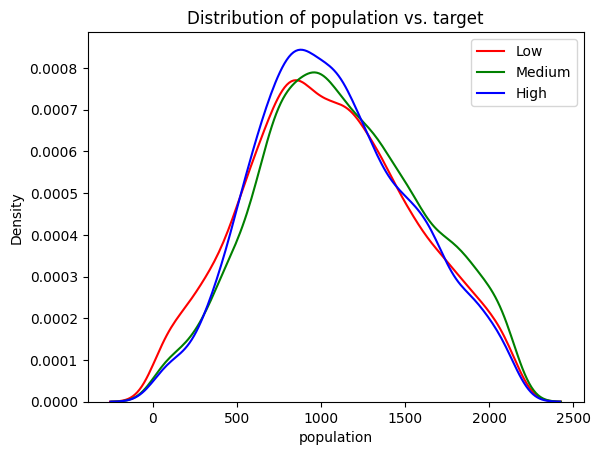

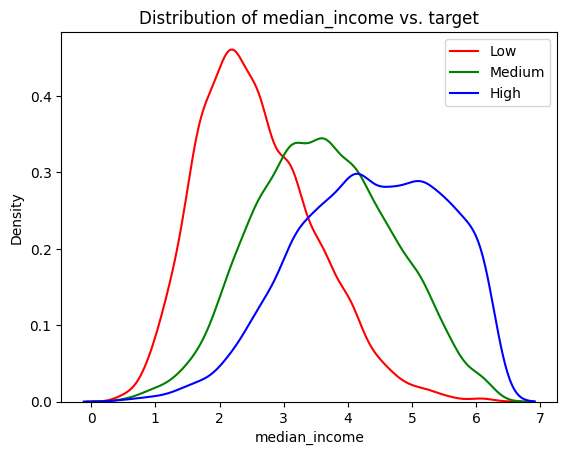

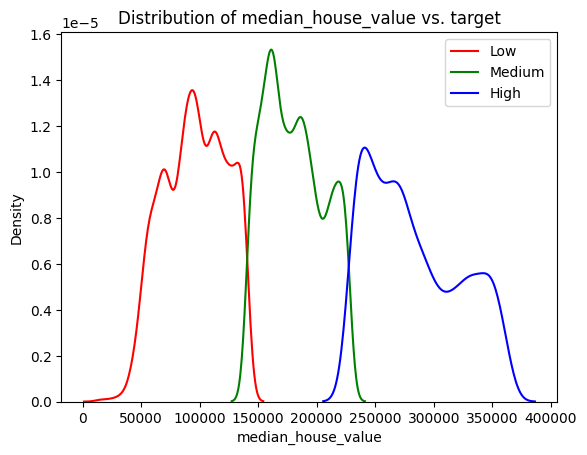

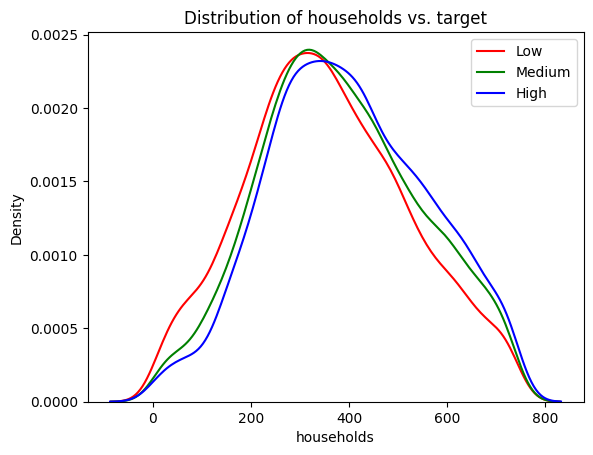

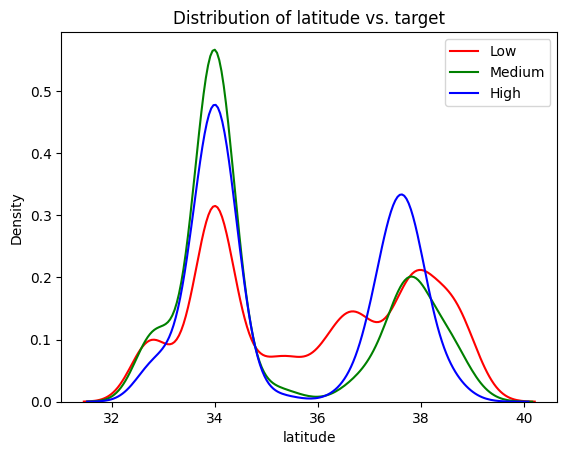

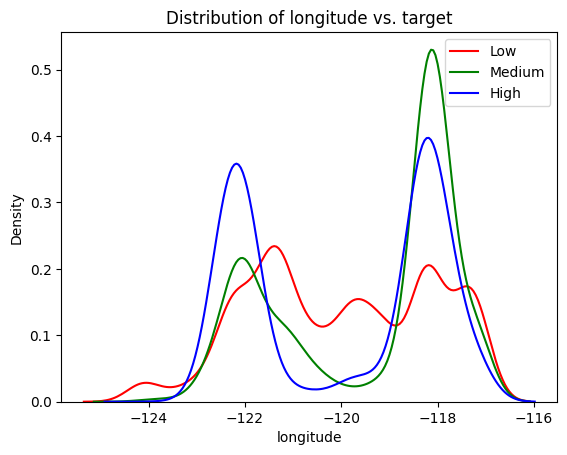

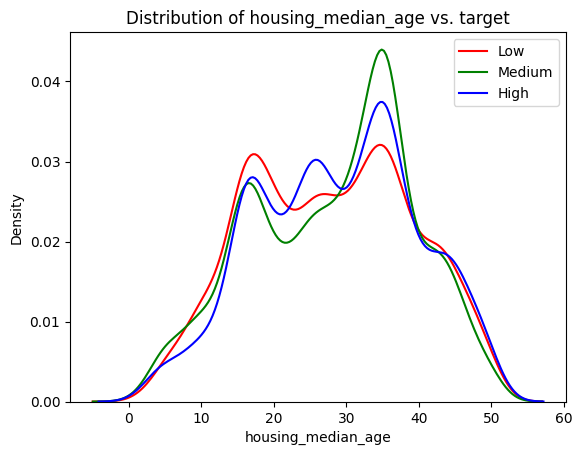

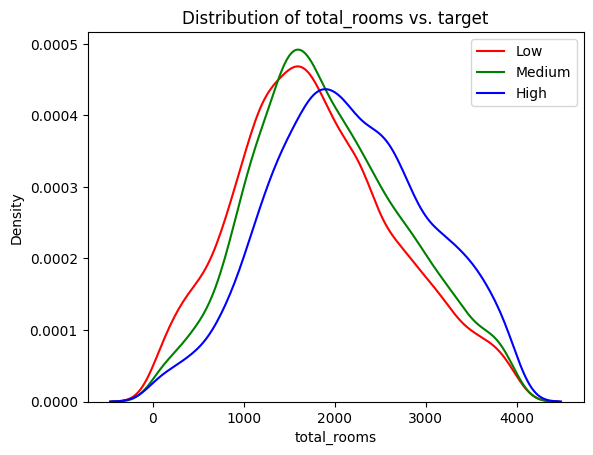

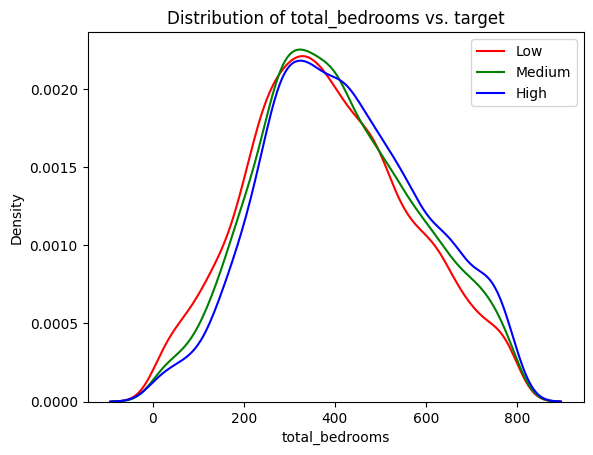

In [129]:
for x in continuous_feature_set:
    distribution_analysis(x, "target", data, "Low", "Medium", "High")
    print("")

In [130]:
def object_feature_visualize(attr_col, agg_col, df:pd.DataFrame, label_value):
    
    df["dummy"] = df.index
    #a=df.groupby(attr).agg({"dummy": 'count', agg_col: np.mean}).reset_index()

    a=df.groupby([agg_col, attr_col]).agg({"dummy": 'count'}).reset_index()
    a = a[a[agg_col]==label_value]

    a["share"] = 100*a["dummy"]/a.dummy.sum()

    ax1 = sns.barplot(x=attr_col, 
                      y='dummy', 
                      #alpha=0.7, 
                      data=a, 
                      color='cyan')
    ax1.set_ylabel('Number of observations')
    ax1.set_xlabel(attr_col)

    ax2 = ax1.twinx()
    sns.pointplot(x=attr_col, 
                  y="share", 
                  #alpha=0.7,
                  data=a, 
                  ax=ax2, 
                  color='red')
    plt.ylim([0, 105])
    ax2.set_ylabel('{} info'.format(agg_col))

    ymin, ymax = ax2.get_ylim()
    color="#3498db" # choose a color
    margin = (ymax - ymin) / 200

    aaa = [ax2.text(p[0]+margin/5, p[1]+margin/2, str(int(p[1]))+'%', color='black') for p in zip(ax2.get_xticks(), a["share"])]

    title = 'Cumulative Gains Chart for column '+ attr_col + ": "+ str(label_value)
    plt.title(title, fontsize=10)

    ax1.set_xticklabels(a[attr_col], rotation=45)
    ax2.set_xticklabels(a[attr_col], rotation=45)

    plt.show()

In [131]:
object_feature_set = set(["ocean_proximity"])

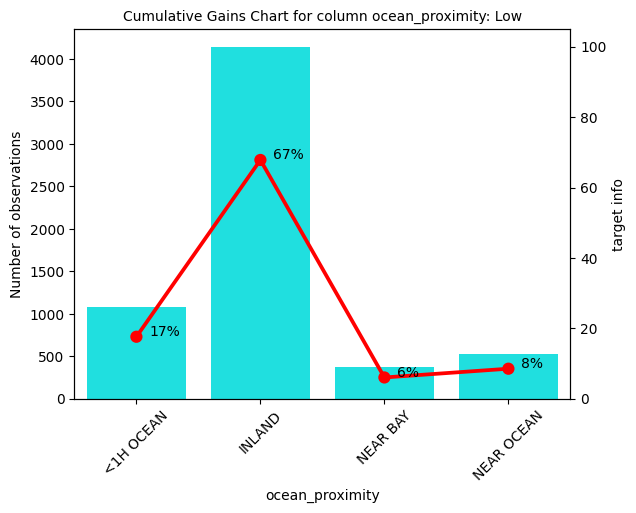

-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------



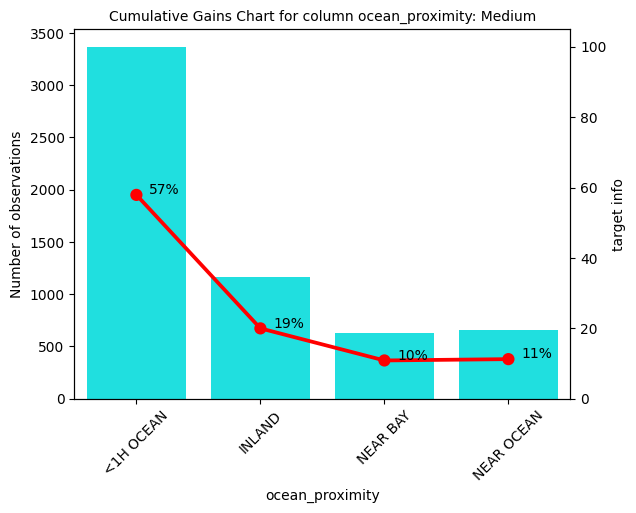

-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------



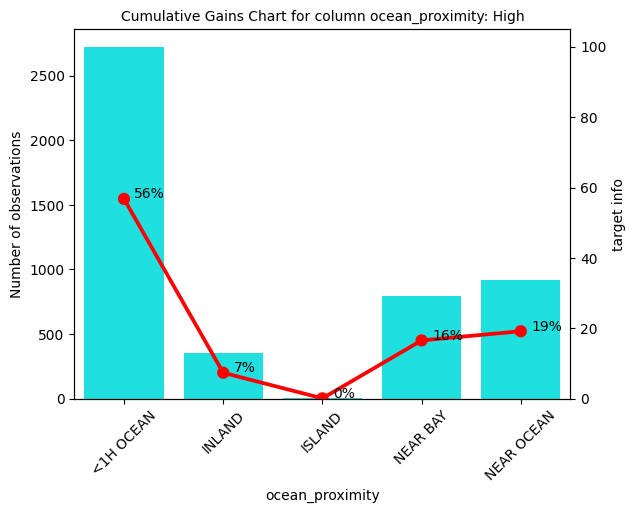

In [132]:
object_feature_visualize("ocean_proximity", 'target', data, "Low")

print("-----------------------------------------------------------------------------------------")
print("-----------------------------------------------------------------------------------------\n")

object_feature_visualize("ocean_proximity", 'target', data, "Medium")

print("-----------------------------------------------------------------------------------------")
print("-----------------------------------------------------------------------------------------\n")

object_feature_visualize("ocean_proximity", 'target', data, "High")

## Feature Engineering

Lets try to create new features, combining together some original ones, including *rooms_per_household*, *population_per_household* and *bedrooms_per_room*

Before proceeding with the models *ocean_proximity* must be encoded to an integer using simple encoding method such as `LabelEncoder()` in Scikit-Learn.

In [133]:
# from sklearn.base import BaseEstimator, TransformerMixin

# rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

# class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
#   def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
#     self.add_bedrooms_per_room = add_bedrooms_per_room
#   def fit(self, X, y=None):
#     return self # nothing else to do
#   def transform(self, X):
#     rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
#     population_per_household = X[:, population_ix] / X[:, households_ix]
#     if self.add_bedrooms_per_room:
#       bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
#       return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
#     else:
#       return np.c_[X, rooms_per_household, population_per_household]

# attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
# housing_extra_attribs = attr_adder.transform(data.values)
# housing_extra_attribs

In [134]:
# data["rooms_per_household"] = data["total_rooms"]/data["households"]
# data["bedrooms_per_room"] = data["total_bedrooms"]/data["total_rooms"]
# data["population_per_household"]=data["population"]/data["households"]

# data.drop(['total_rooms', 'households', 'total_bedrooms', 'population', 'median_house_value'], axis=1, inplace=True)

In [135]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data['ocean_proximity'] = LabelEncoder().fit_transform(data['ocean_proximity'])
data['target'] = LabelEncoder().fit_transform(data['target'])
data.sample(3)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
10591    -117.78     33.68                19.0       2500.0           331.0   
15370    -117.24     33.40                16.0       2704.0           463.0   
6467     -118.05     34.10                30.0       2143.0           427.0   

       population  households  median_income  median_house_value  \
10591      1027.0       327.0         6.1150            315600.0   
15370      1322.0       424.0         3.7857            227000.0   
6467       1107.0       416.0         4.2321            252200.0   

       ocean_proximity  target  dummy  
10591                0       0  10591  
15370                0       2  15370  
6467                 1       0   6467

In [136]:
data.corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.922606           -0.084216    -0.012766   
latitude            -0.922606  1.000000           -0.016779     0.013963   
housing_median_age  -0.084216 -0.016779            1.000000    -0.279698   
total_rooms         -0.012766  0.013963           -0.279698     1.000000   
total_bedrooms       0.027281 -0.038431           -0.211499     0.882456   
population           0.112482 -0.143196           -0.172861     0.759217   
households           0.025659 -0.063067           -0.178513     0.873528   
median_income       -0.002880 -0.090834           -0.172347     0.302592   
median_house_value  -0.037528 -0.164280            0.091090     0.200727   
ocean_proximity     -0.275177  0.185280            0.102405     0.008436   
target               0.123811 -0.063129           -0.062292    -0.114804   
dummy               -0.095684  0.066614           -0.198367     0.103986   

                    total_bedrooms  population  households  median_income  \
longitude                 0.027281    0.112482    0.025659      -0.002880   
latitude                 -0.038431   -0.143196   -0.063067      -0.090834   
housing_median_age       -0.211499   -0.172861   -0.178513      -0.172347   
total_rooms               0.882456    0.759217    0.873528       0.302592   
total_bedrooms            1.000000    0.812877    0.965361      -0.013811   
population                0.812877    1.000000    0.859229       0.018520   
households                0.965361    0.859229    1.000000       0.032489   
median_income            -0.013811    0.018520    0.032489       1.000000   
median_house_value        0.089406   -0.008528    0.120794       0.635508   
ocean_proximity           0.027596   -0.086948    0.019396      -0.048954   
target                   -0.027984    0.062259   -0.035908      -0.280850   
dummy                     0.057849    0.035344    0.062075       0.095200   

                    median_house_value  ocean_proximity    target     dummy  
longitude                    -0.037528        -0.275177  0.123811 -0.095684  
latitude                     -0.164280         0.185280 -0.063129  0.066614  
housing_median_age            0.091090         0.102405 -0.062292 -0.198367  
total_rooms                   0.200727         0.008436 -0.114804  0.103986  
total_bedrooms                0.089406         0.027596 -0.027984  0.057849  
population                   -0.008528        -0.086948  0.062259  0.035344  
households                    0.120794         0.019396 -0.035908  0.062075  
median_income                 0.635508        -0.048954 -0.280850  0.095200  
median_house_value            1.000000         0.062723 -0.488518  0.090489  
ocean_proximity               0.062723         1.000000 -0.104175  0.095939  
target                       -0.488518        -0.104175  1.000000 -0.089565  
dummy                         0.090489         0.095939 -0.089565  1.000000

In [137]:
# sns.heatmap(data.corr(), annot=True, fmt=".1f")

In [138]:
#Fill diagonal and upper half with NaNs
mask = np.zeros_like(data.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True
data.corr()[mask] = np.nan
(data.corr()
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(color='#f1f1f1')  # Color NaNs grey
 .format(precision=2))

In [139]:
data = data.drop(columns="dummy")

### Principal Component Analysis

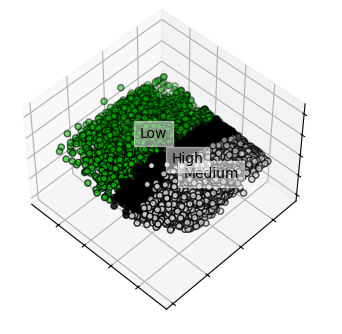

In [140]:
import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
import numpy as np

from sklearn import datasets, decomposition

np.random.seed(5)

iris = datasets.load_iris()
X = data.drop(columns=["target"])
y = data["target"]

fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])


plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [("Low", 0), ("Medium", 1), ("High", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()

In [141]:
data_pca = pd.DataFrame(X, columns=['pca0', 'pca1', 'pca2'])
data_pca.sample(3)

pca0         pca1        pca2
16421  89673.489212    48.715680  461.054297
8123   23969.829048 -1540.765487  165.205472
685   -31028.405333  -450.975222 -120.351060

In [142]:
pca.get_feature_names_out()

array(['pca0', 'pca1', 'pca2'], dtype=object)

In [143]:
data_pca.corr()

pca0          pca1          pca2
pca0  1.000000e+00  1.389750e-15  1.917227e-16
pca1  1.389750e-15  1.000000e+00 -1.967349e-15
pca2  1.917227e-16 -1.967349e-15  1.000000e+00

## Bulding the ML Pipeline
We are building a basic pipeline with two steps,

* Normalize numerical features with `StandardScaler()`
* Run the Classifier, `KNearestClassifier()`, and then some other types of classifiers


In [144]:
pipeline = Pipeline([
    ('normalizer', StandardScaler()), #Step1 - normalize data
    ('clf', LogisticRegression())     #step2 - classifier
])
pipeline.steps

[('normalizer', StandardScaler()), ('clf', LogisticRegression())]

In [145]:
data = data.drop(columns=["median_house_value"])

In [146]:
data.sample(3)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
3704     -118.37     34.19                19.0       2890.0           821.0   
9874     -121.83     36.62                33.0       2938.0           576.0   
10170    -117.98     33.87                25.0       2037.0           515.0   

       population  households  median_income  ocean_proximity  target  
3704       2203.0       705.0         2.6696                0       2  
9874       1516.0       568.0         3.5000                0       2  
10170      1435.0       496.0         3.3199                0       2

In [147]:
X, y = data.drop(columns=["target"]), data['target']

In [148]:
# X, y = data_pca, data['target']

In [149]:
#Seperate train and test data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.4,
                                                    random_state = 10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10034, 9)
(6690, 9)
(10034,)
(6690,)


### Starting with Logistic Regression Classifier

Use Cross-validation to test the accuracy of the pipeline

In [150]:
from sklearn.model_selection import cross_validate

scores = cross_validate(pipeline, X_train, y_train)
scores

{'fit_time': array([0.11791205, 0.10112929, 0.10402083, 0.09878421, 0.11915636]),
 'score_time': array([0.        , 0.00600433, 0.00747728, 0.00516224, 0.00203919]),
 'test_score': array([0.72994519, 0.71948181, 0.69706029, 0.71998007, 0.722333  ])}

In [151]:
scores['test_score'].mean()

0.7177600730444442

### Average accuracy of pipeline with Logistic Regression with no predefined parameters is: 71.77%

## Spot Check Algorithms in the pipeline

#### Trying out the following classification algorithms

    -LogisticRegression
    -Support Vector Machines - linear and rbf
    -K-nearest Classifier
    -Decision Tree Classifier
    -Gradient Bossting Classifier
    -Catboost Classifier

In [67]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [68]:
clfs = []
clfs.append(LogisticRegression())
clfs.append(SVC())
clfs.append(KNeighborsClassifier(n_neighbors=5))
clfs.append(DecisionTreeClassifier())
clfs.append(RandomForestClassifier())
clfs.append(GradientBoostingClassifier())
# clfs(append(CatBoostClassifier()))

for classifier in clfs:
    pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, X_train, y_train)
    print('---------------------------------')
    print(str(classifier))
    print('---------------------------------')
    for key, values in scores.items():
            print(key,' mean ', values.mean())
            print(key,' std ', values.std())

---------------------------------
LogisticRegression()
---------------------------------
fit_time  mean  0.12856993675231934
fit_time  std  0.030996875145427125
score_time  mean  0.008306407928466797
score_time  std  0.003737999098683518
test_score  mean  0.7177600730444442
test_score  std  0.011006930779499968
---------------------------------
SVC()
---------------------------------
fit_time  mean  2.34198637008667
fit_time  std  0.09807416408615433
score_time  mean  1.1156261920928956
score_time  std  0.041553558117821944
test_score  mean  0.750348853787417
test_score  std  0.011495689835801874
---------------------------------
KNeighborsClassifier()
---------------------------------
fit_time  mean  0.01810140609741211
fit_time  std  0.004375977382947516
score_time  mean  0.10525264739990234
score_time  std  0.00872557250973603
test_score  mean  0.7149687956558823
test_score  std  0.008222053210803148
---------------------------------
DecisionTreeClassifier()
------------------------

In [152]:
from catboost import CatBoostClassifier

In [153]:
# CatBoostClassifier() full model

from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=1000,
                           task_type="CPU",
                           learning_rate = 1,
                           devices='5',
                           depth=10,
                           loss_function='MultiClass')
model.fit(X_train,
          y_train,
          verbose=False)

# Fit model
#model.fit(train_data, train_labels, cat_features)

# Get predicted classes
preds_class = model.predict(X_test)

# Get predicted probabilities for each class
preds_proba = model.predict_proba(X_test)

# Get predicted RawFormulaVal
preds_raw = model.predict(X_test, prediction_type='RawFormulaVal')
print(model.get_best_score())

{'learn': {'MultiClass': 0.004738767351754219}}


In [154]:
from sklearn.metrics import classification_report
target_names = ['Low', 'Medium', 'High']
print(classification_report(y_test, preds_class, target_names=target_names))

              precision    recall  f1-score   support

         Low       0.81      0.78      0.80      1878
      Medium       0.85      0.86      0.85      2484
        High       0.70      0.71      0.71      2328

    accuracy                           0.79      6690
   macro avg       0.79      0.78      0.79      6690
weighted avg       0.79      0.79      0.79      6690



In [157]:
accuracy = accuracy_score(y_test, preds_class)
print('Accuracy of the Catboost classifier after CV is %.3f%%' % (accuracy*100))

Accuracy of the Catboost classifier after CV is 78.685%


<b> Among the Classifiers, RandomForestClassifier has the highest accuracy of 81.5%, so we choose RandomForestClassifier as a final model </b>

## Cross-Validation and Hyperparameter Tuning for the RandomForestClassifier model

Cross Validation is the process of finding the best combination of parameters for the model by traning and evaluating the model for each combination of the parameters.

In [158]:
# # For the RandomForestRegressor()
# cv_grid = GridSearchCV(pipeline, param_grid = {})

# cv_grid.fit(X_train, y_train)

In [159]:
# # RandomForestRegressor full model

# model = RandomForestClassifier(random_state=30)

# param_grid = {"n_estimators"      : [400, 500],
#               "criterion"         : ["gini", "entropy"],
#               "max_features"      : [2, 5],
#               "max_depth"         : [10, 20],
#               "min_samples_split" : [2, 4, 5, 7],
#               "bootstrap": [True]}

# cv_grid = GridSearchCV(model, param_grid, n_jobs=-1, cv=2)

# cv_grid.fit(X_train, y_train)

In [160]:
# {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 5, 'min_samples_split': 7, 'n_estimators': 500}

In [161]:
# SVC() full model

# cv_grid = GridSearchCV(pipeline, param_grid = {
#     'clf__kernel' : ['linear', 'rbf'],
#     'clf__C' : np.linspace(0.1,1.2,12)
# })

# cv_grid.fit(X_train, y_train)

## Fit the final model to the data - RandomForestClassifier

In [162]:
from sklearn.model_selection import GridSearchCV
pipeline.set_params(clf= RandomForestClassifier())
pipeline.steps

[('normalizer', StandardScaler()), ('clf', RandomForestClassifier())]

In [163]:
# Without parameters
cv_grid = GridSearchCV(pipeline, param_grid = {})
cv_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('normalizer', StandardScaler()),
                                       ('clf', RandomForestClassifier())]),
             param_grid={})

The best combination of the parameters can be accessed from `best_params_`

In [164]:
cv_grid.best_params_

{}

In [165]:
cv_grid.best_estimator_

Pipeline(steps=[('normalizer', StandardScaler()),
                ('clf', RandomForestClassifier())])

In [166]:
cv_grid.best_score_

0.7909108747499405

In [167]:
y_predict = cv_grid.predict(X_test)
y_predict_proba = cv_grid.predict_proba(X_test)

accuracy = accuracy_score(y_test,y_predict)
print('Accuracy of the best classifier after CV is %.3f%%' % (accuracy*100))

Accuracy of the best classifier after CV is 78.834%


In [168]:
from sklearn.metrics import classification_report
target_names = ['Low', 'Medium', 'High']
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

         Low       0.81      0.79      0.80      1878
      Medium       0.84      0.87      0.85      2484
        High       0.71      0.70      0.71      2328

    accuracy                           0.79      6690
   macro avg       0.79      0.79      0.79      6690
weighted avg       0.79      0.79      0.79      6690



In [169]:
y_test.value_counts(True)

1    0.371300
2    0.347982
0    0.280717
Name: target, dtype: float64

In [170]:
cv_grid.classes_

array([0, 1, 2])

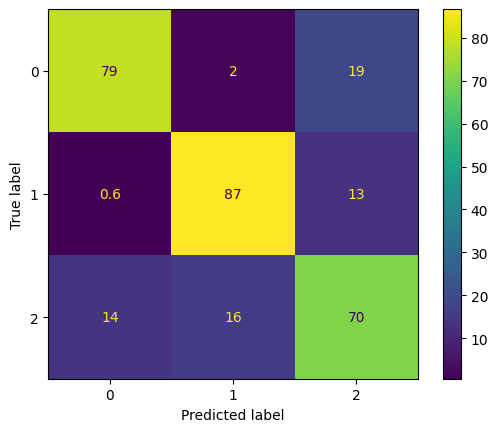

In [171]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_predict, labels=cv_grid.classes_)

cm = 100*cm.astype('float64') / cm.sum(axis=1)[:, np.newaxis]


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=cv_grid.classes_)

disp.plot()
plt.show()

# Save the model to use it later

In [172]:
# Import Joblib
import joblib

# Save the model to a file
joblib.dump(cv_grid, 'random_forest_classifier_model.joblib')

['random_forest_classifier_model.joblib']

In [173]:
cv_grid

GridSearchCV(estimator=Pipeline(steps=[('normalizer', StandardScaler()),
                                       ('clf', RandomForestClassifier())]),
             param_grid={})

In [174]:
# Load the model using Joblib
import joblib
cv_grid = joblib.load('random_forest_classifier_model.joblib')

In [175]:
preds = pd.DataFrame(y_predict_proba, columns = ["Low", "Medium", "High"])

In [176]:
preds.sample(3)

Low  Medium  High
6292  0.29    0.02  0.69
1751  0.66    0.04  0.30
289   0.17    0.01  0.82

In [177]:
preds["Low"].value_counts()

0.00    1206
0.01     511
0.02     300
0.03     239
0.05     190
        ... 
0.42      21
0.75      19
0.53      18
0.59      17
0.48      10
Name: Low, Length: 101, dtype: int64

<Axes: xlabel='Low', ylabel='Density'>

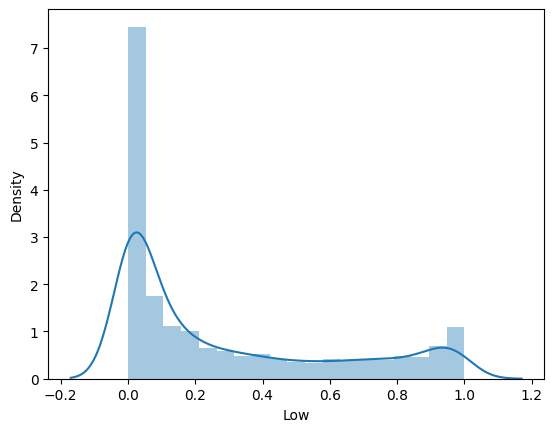

In [178]:
sns.distplot(preds["Low"])

In [179]:
preds["Medium"].value_counts()

0.00    1038
0.01     462
0.02     291
0.03     216
1.00     207
        ... 
0.65      21
0.61      20
0.42      18
0.48      17
0.54      17
Name: Medium, Length: 101, dtype: int64

<Axes: xlabel='Medium', ylabel='Density'>

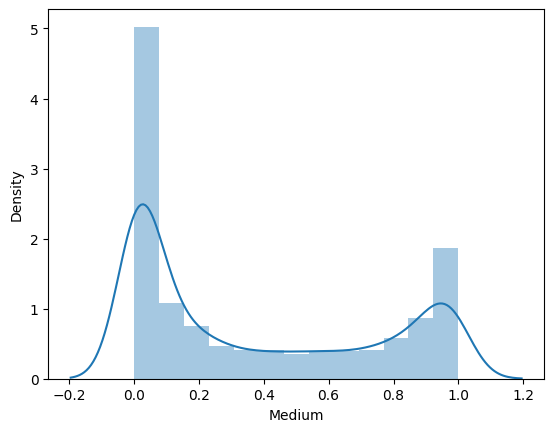

In [180]:
sns.distplot(preds["Medium"])

In [181]:
preds["High"].value_counts()

0.00    294
0.02    233
0.01    204
0.03    194
0.04    186
       ... 
0.95     15
0.97     14
0.99     10
0.98      8
1.00      1
Name: High, Length: 101, dtype: int64

<Axes: xlabel='High', ylabel='Density'>

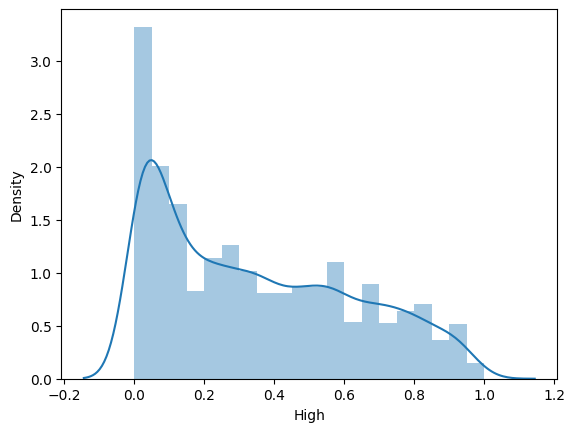

In [182]:
sns.distplot(preds["High"])

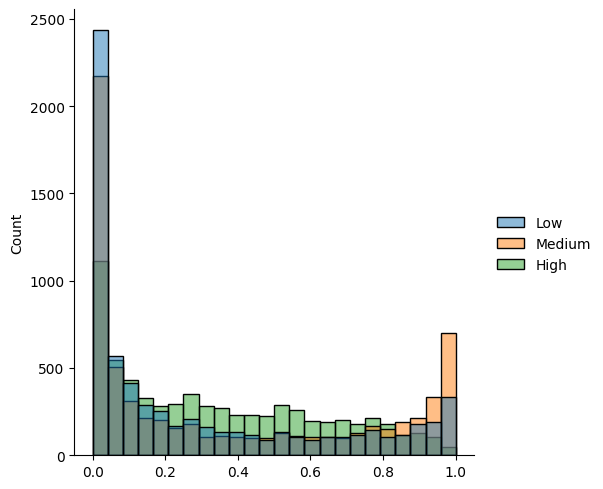

In [183]:
sns.displot(preds)

In [189]:
listt = np.array(X_test.sample(5)).astype(int)

In [190]:
listt

array([[-117,   33,   24, 4365,  804, 2663,  753,    4,    0],
       [-121,   38,   19, 3326,  561, 1544,  511,    2,    1],
       [-117,   34,   18, 2127,  443, 1168,  401,    3,    1],
       [-118,   34,   23, 3098,  542, 1486,  492,    5,    0],
       [-121,   40,   17, 2816,  639, 1027,  406,    2,    1]])

In [191]:
cv_grid.predict(listt)

array([2, 1, 1, 0, 1])